In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

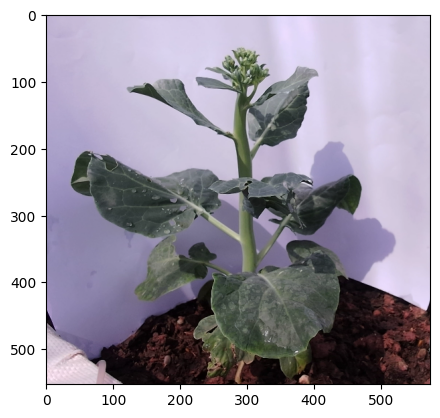

In [2]:
img_path = r'C:\Cantonese\52.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(np.float64(-0.5), np.float64(574.5), np.float64(552.5), np.float64(-0.5))

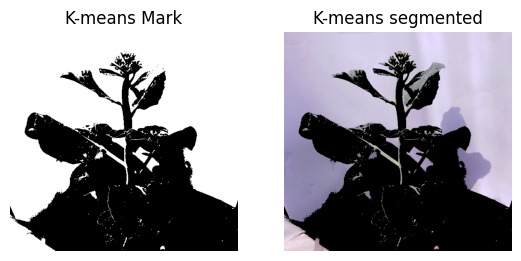

In [9]:
# แปลงเป็นเวกเตอร์ 2D (แต่ละพิกเซลมี R, G, B)
pixel_vals = img_rgb.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# ทำ KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42).fit(pixel_vals)
labels = kmeans.labels_.reshape(img.shape[:2])

# แสดงกลุ่มที่เราสนใจ 
cluster_id = np.argmax([np.mean(pixel_vals[labels.flatten() == i]) for i in range(k)])
mask_kmeans = (labels == cluster_id).astype(np.uint8) * 255
result_kmeans = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_kmeans.astype(np.uint8))

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(mask_kmeans, cmap='gray')
plt.title('K-means Mark')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_kmeans)
plt.title('K-means segmented')
plt.axis('off')